# Task3-
1.Download bank dataset-
https://drive.google.com/open?id=1N7raOWmOSyJPhZtzulVxNx8aYYqOjPAX
2.Develop a binomial  logistic regression using attributes BP + weight
Observe all parameters (Null Deviance, Residual deviance, P value, Fisher score, AIC , Degree of freedom)
3.Develop a binomial  logistic regression using single  attribute “BP”
Observe changes in all parameters (Null Deviance, Residual deviance, P value, Fisher score, AIC , Degree of freedom)
4.Deduce the conclusion from point 2 and 3
5.Think to improve the model…
Hint- Polynomial logistic regression 
Hint- to confirm it – see the data distribution (plot(weight,BP,col=Suffered.Heart.storke+1)). 
6.One of many solutions can be-
BPS = BP*BP
weights = weight*weight
BPweight = BP*weight

m1=glm(Suffered.Heart.storke~BP+weight+weights+BPS+BPweight,family=binomial)
m1=glm(Suffered.Heart.storke~BP+weight+weights+BPS,family=binomial)

In [156]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 1. Import data set

In [157]:
df = pd.read_csv('health.csv')
print(df.head())
print(df.shape)
df.describe(include='all')

   weight   BP  Suffered.Heart.storke
0      55   41                      0
1      55   85                      0
2      33   88                      1
3      25  102                      1
4      37   81                      0
(1742, 3)


,weight,BP,Suffered.Heart.storke
count,1742.000000,1742.000000,1742.000000
mean,55.000000,68.394948,0.533869
std,21.141573,21.565234,0.498995
min,8.000000,29.000000,0.000000
25%,39.000000,52.000000,0.000000
50%,55.000000,64.000000,1.000000
75%,71.000000,85.000000,1.000000
max,102.000000,119.000000,1.000000


In [158]:
df.columns= ['weight','bp','y']

In [159]:
df.groupby('y').mean()

,weight,bp
y,,
0,55.0,62.174877
1,55.0,73.825806


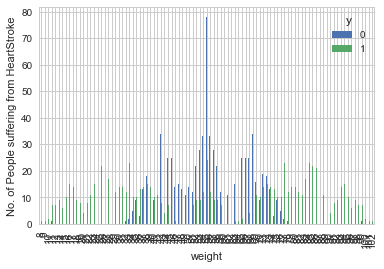

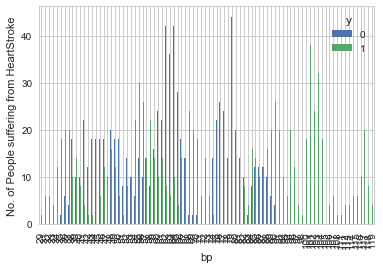

In [160]:
for i in df.columns:
    if i!='y':
        pd.crosstab(df[i],df.y).plot(kind='bar')
        plt.xlabel(i)
        plt.ylabel('No. of People suffering from HeartStroke')
        plt.show()

# .Develop a binomial  logistic regression using attributes BP + weight Observe all parameters (Null Deviance, Residual deviance, P value, Fisher score, AIC , Degree of freedom)

In [161]:

X = df.iloc[:,df.columns!='y']
y = df.iloc[:,df.columns=='y']

import statsmodels.api as sm

Model = sm.Logit(y,X)
Model = Model.fit()
print(Model.summary2())

Optimization terminated successfully.
         Current function value: 0.671541
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.028     
Dependent Variable: y                AIC:              2343.6497 
Date:               2019-04-26 22:37 BIC:              2354.5753 
No. Observations:   1742             Log-Likelihood:   -1169.8   
Df Model:           1                LL-Null:          -1203.5   
Df Residuals:       1740             LLR p-value:      2.3606e-16
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
weight    -0.0113     0.0019   -6.1049   0.0000   -0.0149   -0.0077
bp         0.0125     0.0016    8.0436   0.0000    0.0095 

In [162]:
#Implenting the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
y_pred = logreg.predict(X_test)

print("Real Observed")
print(y_test.y.value_counts())

print("Observed by our Model")
pd.Series(y_pred).value_counts()

Real Observed
1    282
0    241
Name: y, dtype: int64
Observed by our Model


1    285
0    238
dtype: int64

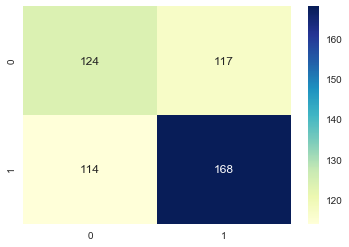

In [164]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,fmt='g',cmap='YlGnBu')

In [165]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5583173996175909
Precision: 0.5894736842105263
Recall: 0.5957446808510638
F1 Score: 0.5925925925925924


# 3.Develop a binomial  logistic regression using single  attribute “BP” Observe changes in all parameters (Null Deviance, Residual deviance, P value, Fisher score, AIC , Degree of freedom)

In [166]:
X = df.iloc[:,df.columns== 'bp']
y = df.iloc[:,df.columns=='y']

import statsmodels.api as sm

Model = sm.Logit(y,X)
Model = Model.fit()
print(Model.summary2())

Optimization terminated successfully.
         Current function value: 0.682515
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.012    
Dependent Variable: y                AIC:              2379.8825
Date:               2019-04-26 22:37 BIC:              2385.3453
No. Observations:   1742             Log-Likelihood:   -1188.9  
Df Model:           0                LL-Null:          -1203.5  
Df Residuals:       1741             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
-------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
bp       0.0041      0.0007    6.0416    0.0000    0.0028    0.0054



In [167]:
#Implenting the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
y_pred = logreg.predict(X_test)

print("Real Observed")
print(y_test.y.value_counts())

print("Observed by our Model")
pd.Series(ypred).value_counts()

Real Observed
1    282
0    241
Name: y, dtype: int64
Observed by our Model


1    288
0    235
dtype: int64

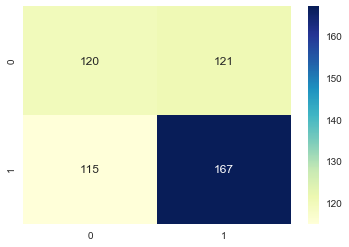

In [169]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,fmt='g',cmap='YlGnBu')

In [170]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5487571701720841
Precision: 0.5798611111111112
Recall: 0.5921985815602837
F1 Score: 0.5859649122807018


# 4. First Model is better than second model because accuracy, precision, recall all values for first model are greater than the second Model

# 5.Observe data distribution

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


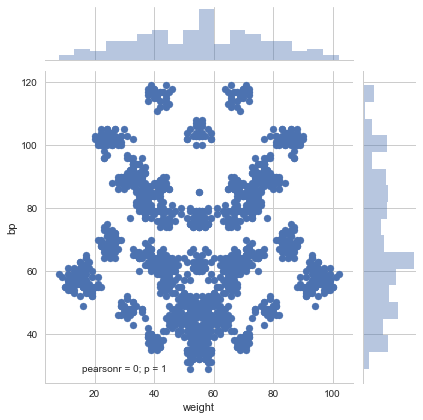

In [171]:
sns.jointplot(x="weight", y="bp", data=df)

# 6.One of many solutions can be 
BPS = BP*BP    
weights = weight*weight 
BPweight = BP*weightdf

m1=glm(Suffered.Heart.storke~BP+weight+weights+BPS+BPweight,family=binomial)
m1=glm(Suffered.Heart.storke~BP+weight+weights+BPS,family=binomial)

In [172]:
bps = df.bp*df.bp
weights = df.weight*df.weight
bpweight = df.bp*df.weight

In [173]:
df['bps']= bps
df['weights']= weights
df['bpweight']= bpweight

In [174]:
X = df.iloc[:,df.columns!='y']
y = df.iloc[:,df.columns=='y']

Model = sm.Logit(y,X)
Model = Model.fit()
Model.summary2()

Optimization terminated successfully.
         Current function value: 0.378287
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.452      
Dependent Variable: y                AIC:              1327.9532  
Date:               2019-04-26 22:37 BIC:              1355.2671  
No. Observations:   1742             Log-Likelihood:   -658.98    
Df Model:           4                LL-Null:          -1203.5    
Df Residuals:       1737             LLR p-value:      1.8597e-234
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
weight        -0.1600    0.0160   -9.9997  0.0000  -0.1914  -0.1286
bp             0.0013    0.0128    0.1037  0.9174  -0.0237   0.0263
bps            0.0023    0.0002   12.7014  0.0000   0.0020   0.0027
weights        0.0049    0.0003   17.7593  0.0000   0.0044   0.0054
bpweight      -0.0051    0.0003  -16.3239  0.0000  -0.0057  -0.0045
==================================================================

"""

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


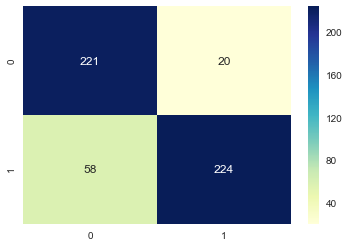

In [176]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,fmt='g',cmap='YlGnBu')

In [177]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy :  0.8508604206500956
Precision: 0.9180327868852459
Recall: 0.7943262411347518
F1 Score: 0.8517110266159698


In [178]:
df = df.drop(columns='bpweight')
X = df.iloc[:,df.columns!='y']
y = df.iloc[:,df.columns=='y']
Model = sm.Logit(y,X)
Model = Model.fit()
Model.summary2()

Optimization terminated successfully.
         Current function value: 0.525176
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.240      
Dependent Variable: y                AIC:              1837.7145  
Date:               2019-04-26 22:37 BIC:              1859.5656  
No. Observations:   1742             Log-Likelihood:   -914.86    
Df Model:           3                LL-Null:          -1203.5    
Df Residuals:       1738             LLR p-value:      8.7814e-125
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
weight    -0.1800     0.0119   -15.0901   0.0000   -0.2034   -0.1566
bp         0.0680     0.0086     7.9571   0.0000    0.0513    0.0848
bps       -0.0002     0.0001    -2.6521   0.0080   -0.0003   -0.0000
weights    0.0018     0.0001    15.6350   0.0000    0.0016    0.0020
==================================================================

"""

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(logreg.intercept_)
print(logreg.coef_)

[0.15195892]
[[-1.91187860e-01  6.74430728e-02 -1.61041123e-04  1.91396605e-03]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


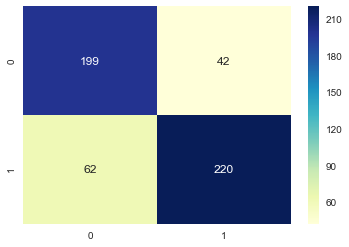

In [180]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,fmt='g',cmap='YlGnBu')

In [181]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy :  0.8011472275334608
Precision: 0.8396946564885496
Recall: 0.7801418439716312
F1 Score: 0.8088235294117647
